# EMNIST 辨識

In [1]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

2024-08-15 19:23:39.731735: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 19:23:40.061237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 19:23:40.189350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 19:23:40.236397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 19:23:40.507142: I tensorflow/core/platform/cpu_feature_guar

### Import and Shape Data

In [2]:
!poetry add emnist

Using version ^0.0 for emnist

Updating dependencies
Resolving dependencies... (1.0s)

Package operations: 2 installs, 0 updates, 0 removals

  - Installing tqdm (4.66.5): Pending...
  - Installing tqdm (4.66.5): Installing...
  - Installing tqdm (4.66.5)
  - Installing emnist (0.0): Pending...
  - Installing emnist (0.0): Downloading... 0%
  - Installing emnist (0.0): Downloading... 100%
  - Installing emnist (0.0): Installing...
  - Installing emnist (0.0)

Writing lock file


## [EMNIST 說明](https://pypi.org/project/emnist/)
## [資料集 說明](https://www.nist.gov/itl/products-and-services/emnist-dataset)

In [2]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
# Working with 'letters'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

In [4]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


In [5]:
import pandas as pd

df = pd.DataFrame({'ascii':labels_train})
df.head()

,ascii
0,23
1,7
2,16
3,15
4,23


In [6]:
df.ascii.value_counts()

ascii
23    4800
7     4800
20    4800
3     4800
4     4800
8     4800
1     4800
12    4800
9     4800
25    4800
2     4800
5     4800
19    4800
26    4800
21    4800
18    4800
14    4800
10    4800
24    4800
22    4800
11    4800
13    4800
17    4800
15    4800
16    4800
6     4800
Name: count, dtype: int64

In [7]:
df.ascii.unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5,  2,
       25,  9, 12,  1,  8,  4,  3, 20,  6], dtype=uint8)

In [8]:
df.ascii.nunique()

26

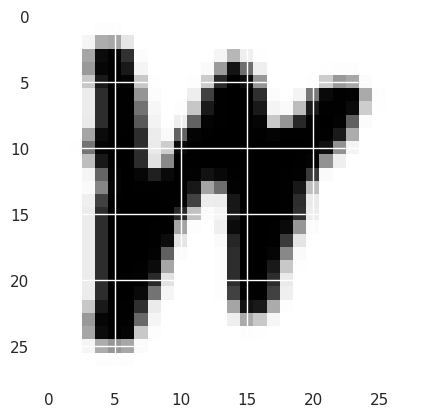

In [9]:
# Plot an image
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys);

In [10]:
labels_train[0]

23

In [12]:
import pandas as pd

df = pd.read_csv('emnist-letters-mapping.txt', header=None, sep = ' ', index_col=0)
df.columns = ['ascii', 'ascii2']
df['character'] = df['ascii'].apply(lambda x: chr(x))
df

,ascii,ascii2,character
0,,,
1,65,97,A
2,66,98,B
3,67,99,C
4,68,100,D
5,69,101,E
6,70,102,F
7,71,103,G
8,72,104,H
9,73,105,I


## [ASCII Table](https://www.asciitable.com/)
<img src='https://www.asciitable.com/asciifull.gif' />

In [57]:
chr(48)

'0'

In [13]:
labels_train[0], df.iloc[labels_train[0]]

(23,
 ascii         88
 ascii2       120
 character      X
 Name: 24, dtype: object)

In [14]:
# 調整 y class -= 1
labels_train = labels_train - 1
labels_test = labels_test - 1
labels_train[0], df.iloc[labels_train[0]]

(22,
 ascii         87
 ascii2       119
 character      W
 Name: 23, dtype: object)

In [15]:
x_train_norm, x_test_norm = images_train / 255.0, images_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(26, activation='softmax')
])

I0000 00:00:1723722514.200375    3614 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723722514.376261    3614 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723722514.376343    3614 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723722514.392790    3614 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723722514.392931    3614 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [17]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train_norm, labels_train, epochs=5, validation_split=0.2)

Epoch 1/5


I0000 00:00:1723722549.747927   23230 service.cc:146] XLA service 0x7f7be4003360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723722549.747969   23230 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-15 19:49:09.786030: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-15 19:49:09.935453: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  31/3120 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.1368 - loss: 3.1196 

I0000 00:00:1723722551.074816   23230 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3120/3120 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6351 - loss: 1.2644 - val_accuracy: 0.8350 - val_loss: 0.5545
Epoch 2/5
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8177 - loss: 0.5986 - val_accuracy: 0.8622 - val_loss: 0.4521
Epoch 3/5
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8441 - loss: 0.4950 - val_accuracy: 0.8755 - val_loss: 0.4116
Epoch 4/5
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8560 - loss: 0.4642 - val_accuracy: 0.8785 - val_loss: 0.3980
Epoch 5/5
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8620 - loss: 0.4361 - val_accuracy: 0.8838 - val_loss: 0.3820


In [19]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, labels_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.3857
compile_metrics: 0.8815


In [20]:
# 使用小畫家，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './alpha/a.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

(500, 500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[11]
